In [1]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [6]:
# 데이터 불러오기
raw_path = './data/'
customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [7]:
# 필요한 데이터 합치기
df_all = pd.DataFrame()
df_all = orders.merge(order_items, on='order_id', how='outer')
df_all = df_all.merge(order_payments, on='order_id', how='outer')
df_all = df_all.merge(order_reviews, on='order_id', how='outer')
df_all = df_all.merge(olist_sellers, on='seller_id', how='outer')
df_all = df_all.merge(olist_products, on='product_id', how='outer')
df_all = df_all.merge(customer, on='customer_id', how='outer')

In [8]:
# datetime
df_all['yearmonth'] = df_all['order_purchase_timestamp'].map(lambda x:x[:7])
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all['order_purchase_timestamp'])
df_all['year'] = df_all['order_purchase_timestamp'].dt.year
df_all['month'] = df_all['order_purchase_timestamp'].dt.month
df_all['hour'] = df_all['order_purchase_timestamp'].dt.hour

In [9]:
# 카테고리 번역 데이터
trans_name = pd.read_csv(f"{raw_path}/product_category_name_translation.csv")

# 기존 df_all과 병합
df_all = df_all.merge(trans_name)
print(df_all.shape)
df_all[["product_category_name", "product_category_name_english"]].sample(5)

(116576, 44)


,product_category_name,product_category_name_english
15964,esporte_lazer,sports_leisure
37522,perfumaria,perfumery
418,utilidades_domesticas,housewares
20728,esporte_lazer,sports_leisure
23519,esporte_lazer,sports_leisure


## 매출 Top15 품목 RFM

In [10]:
top15=['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor',
 'housewares',
 'cool_stuff',
 'auto',
 'garden_tools',
 'toys',
 'baby',
 'perfumery',
 'telephony',
 'office_furniture']

In [11]:
df_top15 = df_all[df_all["product_category_name"].isin(top15)]
df_top15

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,yearmonth,year,month,hour,product_category_name_english
10584,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,delivered,2017-07-12 14:11:58,2017-07-12 14:30:18,2017-07-13 12:47:05,2017-07-18 16:24:42,2017-07-25 00:00:00,1.0,725cbfcaff95a4d43742fdf13cf43c75,...,34.0,bdd30e6e39cc70dde8665187b57af402,13820,jaguariuna,SP,2017-07,2017,7,14,cool_stuff
10585,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,delivered,2017-07-24 22:16:25,2017-07-25 22:25:11,2017-07-26 14:57:42,2017-07-28 19:06:46,2017-08-04 00:00:00,1.0,725cbfcaff95a4d43742fdf13cf43c75,...,34.0,1bcb517dc3cc80868d2fa941174f386c,6298,osasco,SP,2017-07,2017,7,22,cool_stuff
10586,e8f1a30189522698bfce82adf60472e7,945080eedd200e670d94e8b707422871,delivered,2017-07-05 11:58:33,2017-07-05 17:38:31,2017-07-06 11:04:07,2017-07-07 20:44:41,2017-07-18 00:00:00,1.0,725cbfcaff95a4d43742fdf13cf43c75,...,34.0,0e78d5d8e92c4454512d545b10be8585,13211,jundiai,SP,2017-07,2017,7,11,cool_stuff
10587,e71fb32bec49dd4112bcbcc19126d388,f6c383cc79b182ce1550bc57504941c3,delivered,2017-08-02 22:12:03,2017-08-02 22:25:18,2017-08-04 13:39:51,2017-08-08 17:56:12,2017-08-15 00:00:00,1.0,725cbfcaff95a4d43742fdf13cf43c75,...,34.0,59b5158dcd4ab8fce908aba30ea36cc9,2919,sao paulo,SP,2017-08,2017,8,22,cool_stuff
10588,e71fb32bec49dd4112bcbcc19126d388,f6c383cc79b182ce1550bc57504941c3,delivered,2017-08-02 22:12:03,2017-08-02 22:25:18,2017-08-04 13:39:51,2017-08-08 17:56:12,2017-08-15 00:00:00,1.0,725cbfcaff95a4d43742fdf13cf43c75,...,34.0,59b5158dcd4ab8fce908aba30ea36cc9,2919,sao paulo,SP,2017-08,2017,8,22,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14578,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaN,NaN,2016-12-12 00:00:00,1.0,bef13288a0f8b26d763411ced1dfa268,...,40.0,8aa802da0f525a68e7fae5e67929ebdd,18147,aracariguama,SP,2016-10,2016,10,13,cool_stuff
14579,76a8885167de6cebce9e33f8abc9f149,566eb70d22f8c4b3ebd3b2db8718ff7d,delivered,2018-02-19 22:45:39,2018-02-21 06:10:25,2018-02-22 16:36:46,2018-03-12 22:26:30,2018-03-16 00:00:00,1.0,3954b1f7435552939dd7fdc5cbfea1e4,...,26.0,df35c187eb00e0b6670f8c8fc252b7f8,21380,rio de janeiro,RJ,2018-02,2018,2,22,cool_stuff
14580,604b550c04e61700ab7bcb2ac5b5ca53,97ab733376d9693af39f976a97e4b7b2,delivered,2017-10-15 13:01:37,2017-10-17 03:49:37,2017-10-17 19:03:05,2017-10-18 21:05:23,2017-10-27 00:00:00,1.0,1c3122302b284dc602555cee331847da,...,15.0,9a3566c1e9c0ebeb94fa81302533beee,93410,novo hamburgo,RS,2017-10,2017,10,13,cool_stuff
14581,9081eb59066e15ca372cbdf65b67c57e,c276069b9038f794b40e0367b28a64fb,delivered,2018-01-18 17:13:29,2018-01-18 17:35:32,2018-01-19 23:48:43,2018-02-06 21:52:27,2018-02-19 00:00:00,1.0,1c3122302b284dc602555cee331847da,...,15.0,0c1cc81b5b8da875cfdefd97955dde75,49945,sao francisco,SE,2018-01,2018,1,17,cool_stuff


캐글 노트북 ; https://www.kaggle.com/code/ceruttivini/rfm-segmentation-and-customer-analysis

In [12]:
import datetime

# Recency 계산을 위한 max_date
# 해당 주문에서 가장 최근 구매가 일어난 시간을 가져오고, 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더함.(최소값:1 설정)
max_date = max(df_top15["order_purchase_timestamp"]) + datetime.timedelta(days=1)

In [13]:
rfm_data = df_top15.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_data.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_data.head()

,customer_id,recency,frequency,monetary
0,0033f4a2887e07e25aa1204d482f41ba,64,1,350.00
1,00370dfde3d012c420d29657afc2fc8b,212,1,215.00
2,004288347e5e88a27ded2bb23747066c,398,1,229.99
3,00626f29f9b57d3ef7c1739ff03e944e,140,1,129.00
4,006d763076d74d16d66e828e79ec1544,389,1,79.90


고객 분류 기준

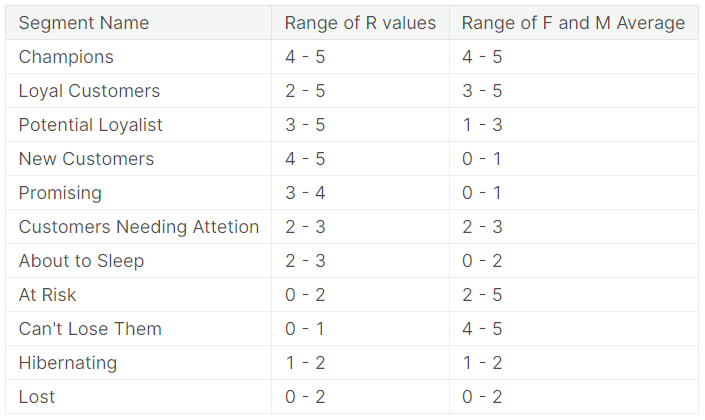

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [28]:
r_labels = k_means_group(rfm_data[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_data[['frequency']],6,1)
m_labels = k_means_group(rfm_data[['monetary']],6,1)

rfm_data = rfm_data.assign(R = r_labels, F = f_labels, M = m_labels)

In [31]:
# rfm_data['R'] = rfm_data['R'] - 1
# rfm_data['R'] = rfm_data['F'] - 1
rfm_data['R'] = rfm_data['M'] - 1

In [32]:
rfm_data.groupby('R')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
R,,,,,,,,
0,2248.0,305.270463,145.725568,1.0,196.75,310.0,420.00,694.0
1,1026.0,250.384990,140.345862,2.0,138.25,238.5,345.75,690.0
2,262.0,320.087786,134.867652,14.0,222.25,319.0,416.50,691.0
3,64.0,348.953125,151.500477,22.0,255.50,338.5,490.75,599.0
4,13.0,267.230769,187.304188,35.0,78.00,266.0,450.00,515.0
5,2.0,212.500000,232.638131,48.0,130.25,212.5,294.75,377.0


In [33]:
# 분류
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

In [34]:
# 분류 함수 적용
rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)

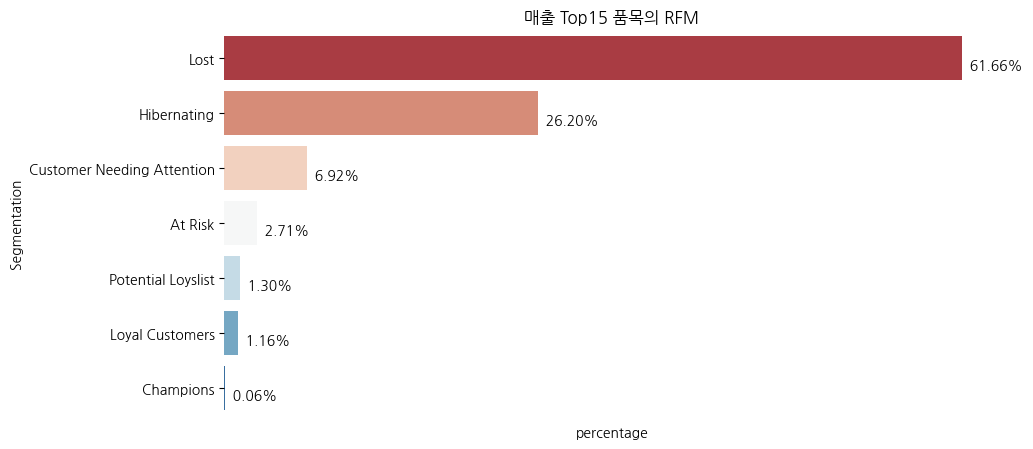

In [36]:
# Top15품목의 RFM 시각화
plt.figure(figsize=(10,5))
percentage = (rfm_data['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("매출 Top15 품목의 RFM")
plt.show()

### squarify 시각화

In [37]:
segmentwise = rfm_data.groupby('segment').agg(RecencyMean = ("recency", "mean"),
                                     FrequencyMean = ("frequency", "mean"),
                                     MonetaryMean = ("monetary", "mean"),
                                     GroupSize=("recency", "size"))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segment,,,,
At Risk,284.326531,2.887755,211.531224,98
Champions,212.500000,2.000000,4948.950000,2
Customer Needing Attention,314.900000,1.156000,531.726760,250
Hibernating,247.033791,1.000000,217.966515,947
Lost,305.669807,1.034096,89.454832,2229
Loyal Customers,322.023810,2.952381,1287.590952,42
Potential Loyslist,370.638298,1.000000,876.373404,47


In [38]:
# 설치
# !pip install squarify

In [39]:
import matplotlib.pyplot as plt
import squarify

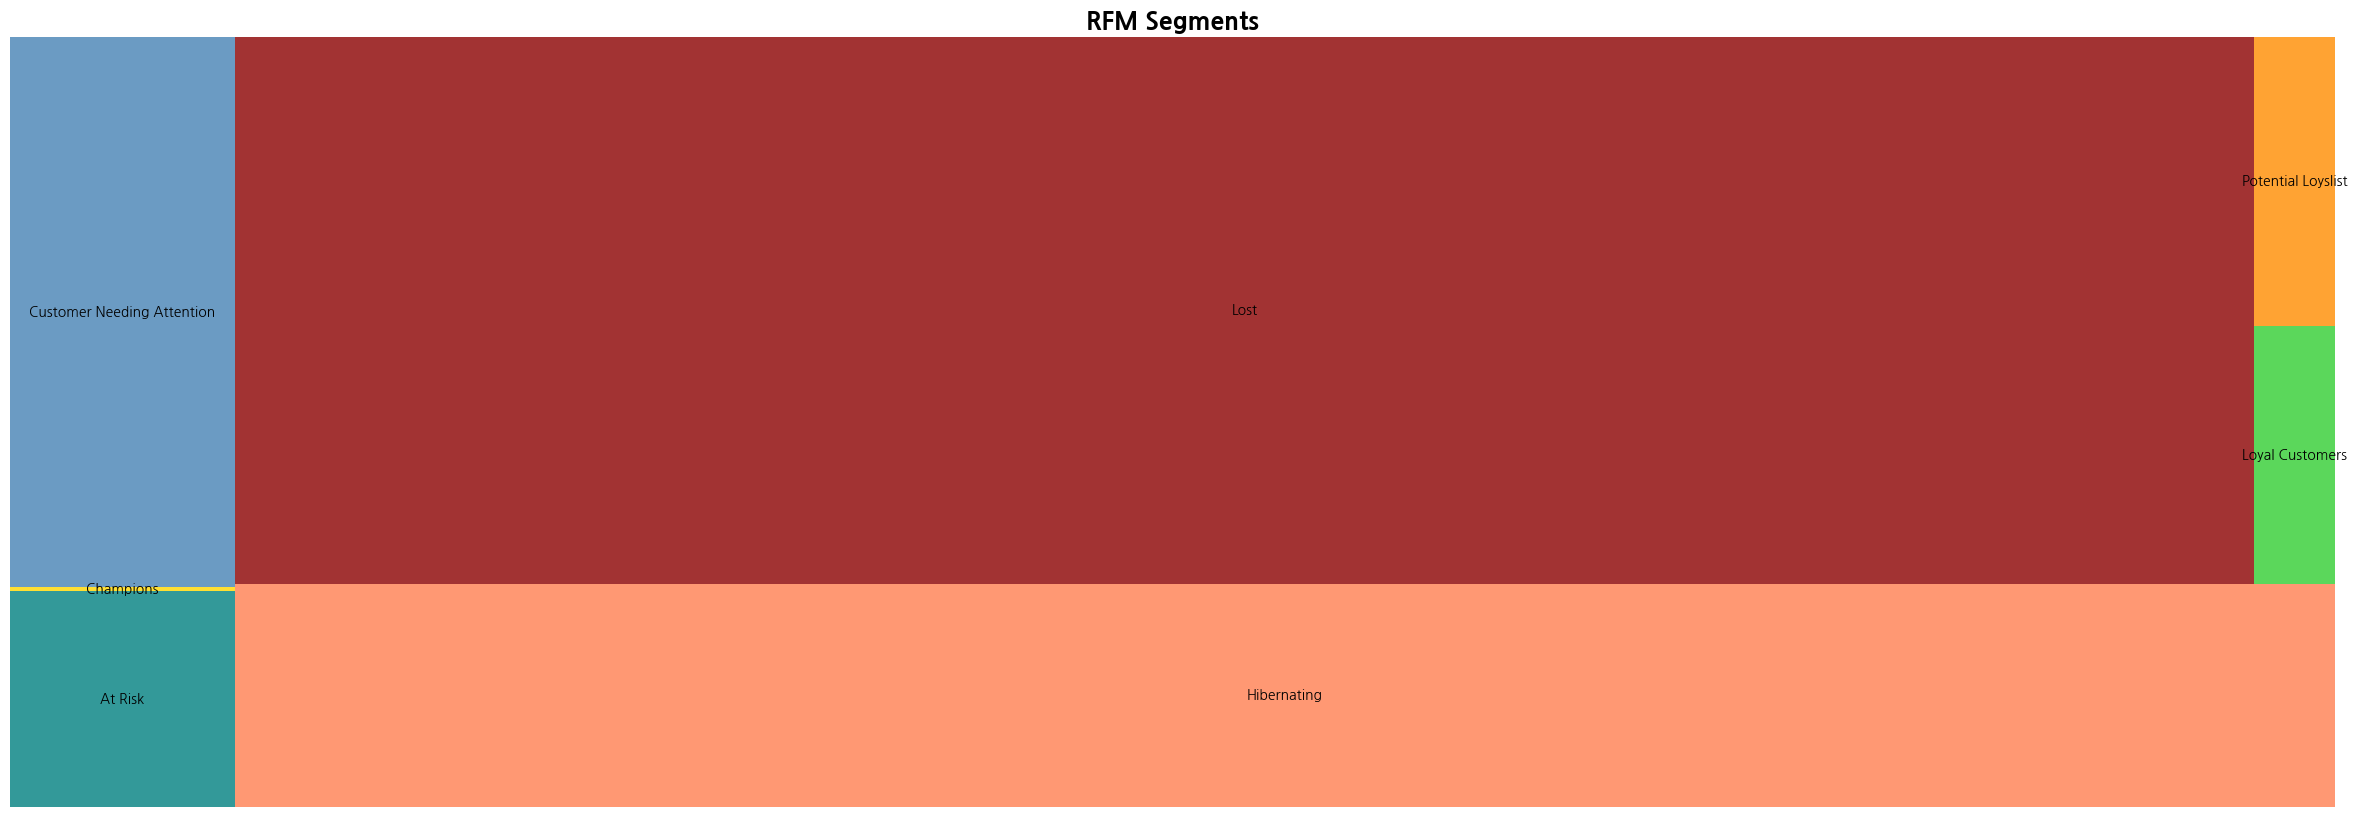

In [40]:
import matplotlib.pyplot as plt
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(30,10)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['teal', 'gold', 'steelblue', 'coral', 'darkred','limegreen', 'darkorange','steelblue'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### 매출 top15 품목별 RFM 시각화

예시 - health_beauty 품목의 경우

In [47]:
df_health_beauty = df_all[df_all['product_category_name_english'] == "health_beauty"]

In [48]:
rfm_health_beauty = df_health_beauty.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_health_beauty.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_health_beauty.head()

,customer_id,recency,frequency,monetary
0,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
1,000a5ad9c4601d2bbdd9ed765d5213b3,383,1,76.99
2,0014a5a58da615f7b01a4f5e194bf5ea,222,1,88.00
3,00293787e2aec37a9c253b63fdfe2049,306,2,237.80
4,002ae492472e45ad6ebeb7a625409392,324,2,103.98


In [49]:
r_labels = k_means_group(rfm_health_beauty[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_health_beauty[['frequency']],6,1)
m_labels = k_means_group(rfm_health_beauty[['monetary']],6,1)

rfm_health_beauty = rfm_health_beauty.assign(R = r_labels, F = f_labels, M = m_labels) 

In [50]:
# rfm_health_beauty['R'] = rfm_health_beauty['R'] - 1
# rfm_health_beauty['R'] = rfm_health_beauty['F'] - 1
rfm_health_beauty['R'] = rfm_health_beauty['M'] - 1

In [51]:
rfm_health_beauty['segment'] = rfm_health_beauty.apply(get_segment,axis=1)

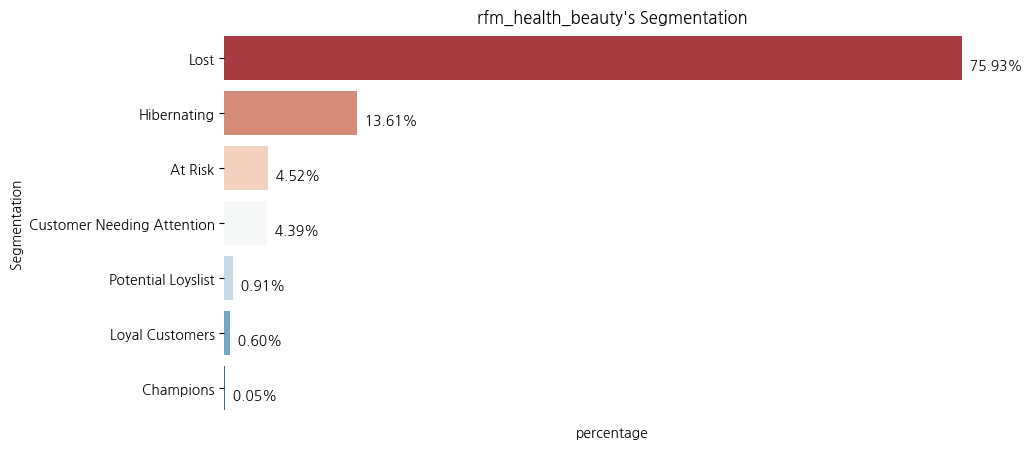

In [52]:
plt.figure(figsize=(10,5))
percentage = (rfm_health_beauty['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_health_beauty's Segmentation")
plt.show()

## 매출 Top8 품목으로 변경 시 RFM

In [53]:
top8 = ['health_beauty',
 'furniture_decor',
 'auto',
 'watches_gifts',
 'bed_bath_table',
 'computers_accessories',
 'housewares',
 'sports_leisure']

In [56]:
# 매출 top8, 2018년 데이터로 한정
df_top8 = df_all[df_all['product_category_name_english'].isin(top8)]
df_top8 = df_top8[df_top8['year'] == 2018]

In [57]:
rfm_data = df_top8.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_data.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_data.head()

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,00053a61a98854899e70ed204dd4bafe,182,2,382.00
3,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,104.90
4,00090324bbad0e9342388303bb71ba0a,158,1,49.95


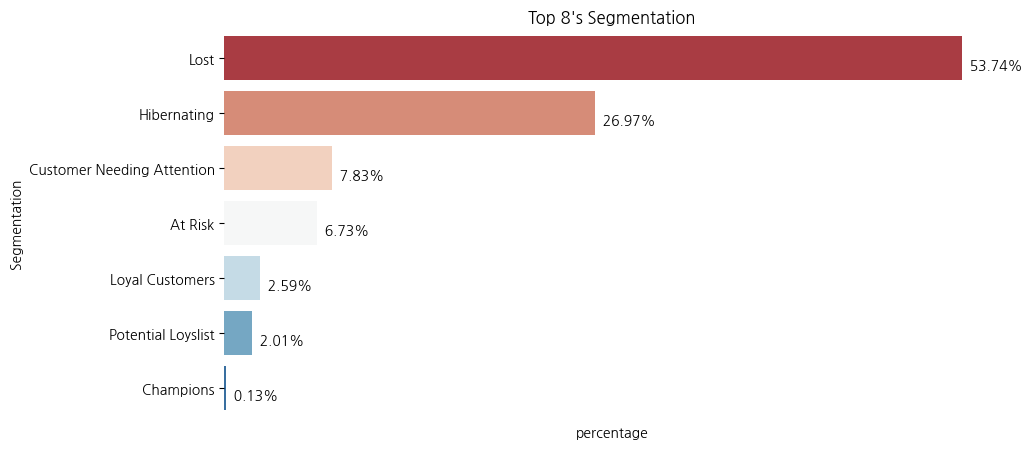

In [58]:
# k_means clustering
# 군집 분석에 의해 그룹을 분류하는 RFM 모형(RFM 분류 방법은 다양함)
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

# R은 최근(낮은 숫자)일수록 높은 점수를 갖도록, F와 M은 값이 클수록 높은 점수를 갖도록 설정
r_labels = k_means_group(rfm_data[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_data[['frequency']],6,1)
m_labels = k_means_group(rfm_data[['monetary']],6,1)

# assign을 사용하여 여러 변수를 한 번에 생성
rfm_data = rfm_data.assign(R = r_labels, F = f_labels, M = m_labels)

rfm_data['R'] = rfm_data['R'] - 1
rfm_data['R'] = rfm_data['F'] - 1
rfm_data['R'] = rfm_data['M'] - 1

# RFM 점수에 따라 분류(등급표 이미지 참고)
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

# segmentation 함수를 적용
rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)

# 시각화
plt.figure(figsize=(10,5))
percentage = (rfm_data['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("Top 8's Segmentation")
plt.show()

### 항목별 RFM 지표 점수 구하기
예시 - health_beauty의 경우

8개의 품목별 점수를 구한 후, 데이터프레임화 예정

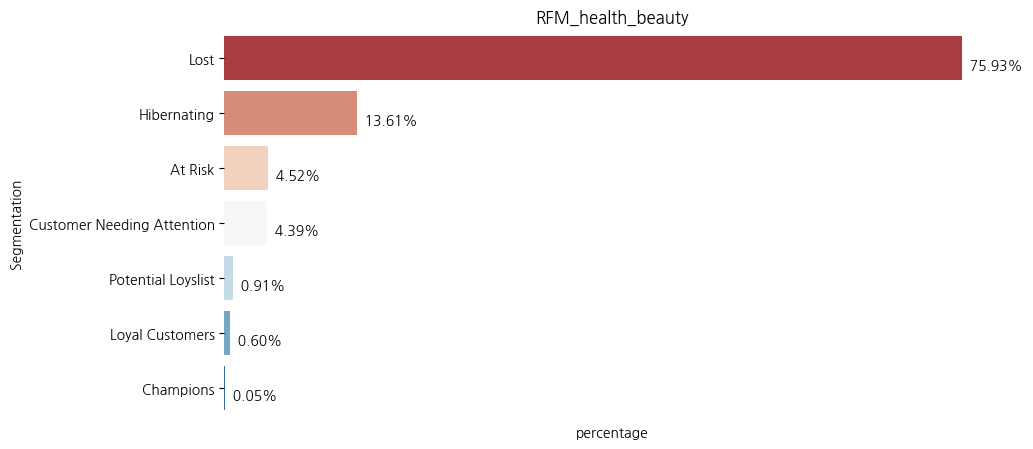

0.4272873934086195

In [61]:
# RFM
rfm_health_beauty = df_health_beauty.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_health_beauty.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_health_beauty.head()

# K-means
r_labels = k_means_group(rfm_health_beauty[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_health_beauty[['frequency']],6,1)
m_labels = k_means_group(rfm_health_beauty[['monetary']],6,1)

rfm_health_beauty = rfm_health_beauty.assign(R = r_labels, F = f_labels, M = m_labels) 

rfm_health_beauty['R'] = rfm_health_beauty['M'] - 1

# segmentation 적용
rfm_health_beauty['segment'] = rfm_health_beauty.apply(get_segment,axis=1)

# 그래프 그리기
plt.figure(figsize=(10,5))
percentage = (rfm_health_beauty['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_health_beauty")
plt.show()

# RFM 평가지표화
pd.DataFrame((rfm_health_beauty['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
health_beauty_segper = pd.DataFrame((rfm_health_beauty['segment'].value_counts(1))).sort_index()
health_beauty_segper['score'] = score
health_beauty_segper['criteria'] = health_beauty_segper['segment'] * health_beauty_segper['score']
health_beauty_sum = health_beauty_segper['criteria'].sum()
health_beauty_sum

### RFM 점수 생성

In [73]:
top8_sum = ["category", "sum"]
pd.DataFrame(top8_sum)

,0
0,category
1,sum


In [74]:
top8_sum = [health_beauty_sum,
 furniture_decor_sum,
 auto_sum,
 watches_gifts_sum,
 bed_bath_table_sum,
 computers_accessories_sum,
 house_wares_sum,
 sports_leisure_sum]

In [75]:
top8_cat = ['health_beauty',
 'furniture_decor',
 'auto',
 'watches_gifts',
 'bed_bath_table',
 'computers_accessories',
 'house_wares',
 'sports_leisure']

In [76]:
Top8_RFM = pd.DataFrame({'category':top8_cat, 'RFM_total':top8_sum}).sort_values('category').reset_index(drop=True)
Top8_RFM

,category,RFM_total
0,auto,0.662513
1,bed_bath_table,1.096993
2,computers_accessories,0.706421
3,furniture_decor,1.048282
4,health_beauty,0.427287
5,house_wares,0.647655
6,sports_leisure,0.860679
7,watches_gifts,0.757346
